# Power Consumption ARIMA Model

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [105]:
dataset = pd.read_csv(r'Home.csv')

C:\Users\sgaks\AppData\Local\Temp\ipykernel_16320\3526446967.py:1: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(r'Home.csv')


In [106]:
dataset.dropna(inplace=True)

In [107]:
dataset.columns = [col.replace(' [kW]', '') for col in dataset.columns]
dataset.columns

Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'],
      dtype='object')

In [108]:
dataset['sum_Furnace'] = dataset[['Furnace 1','Furnace 2']].sum(axis=1)
dataset['avg_Kitchen'] = dataset[['Kitchen 12','Kitchen 14','Kitchen 38']].mean(axis=1)

In [109]:
dataset = dataset.drop(['Kitchen 12','Kitchen 14','Kitchen 38'], axis=1)
dataset = dataset.drop(['Furnace 1','Furnace 2'], axis=1)

In [110]:
dataset

,time,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,sum_Furnace,avg_Kitchen
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,...,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00,0.082617,0.000189
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,...,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00,0.084533,0.000189
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,...,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00,0.083017,0.000206
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,...,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00,0.175417,0.000217
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,...,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00,0.300917,0.000261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503905,1452128305,1.601233,0.003183,1.601233,0.000050,0.041783,0.005267,0.008667,0.013483,0.032283,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,0.727683,0.000211
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.041750,0.005233,0.008433,0.013433,0.032200,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,0.729050,0.000200
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.042033,0.004983,0.008467,0.012933,0.032283,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,1.060117,0.000200
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.042100,0.005333,0.008233,0.012817,0.032183,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,1.116033,0.000217


In [111]:
import time 

In [112]:
time_index = pd.date_range('2016-01-01 05:00', periods=len(dataset),  freq='min')  
time_index = pd.DatetimeIndex(time_index)
dataset = dataset.set_index(time_index)
dataset = dataset.drop(['time'], axis=1)
dataset.iloc[np.r_[0:5,-5:0]].iloc[:,0]

2016-01-01 05:00:00    0.932833
2016-01-01 05:01:00    0.934333
2016-01-01 05:02:00    0.931817
2016-01-01 05:03:00    1.022050
2016-01-01 05:04:00    1.139400
2016-12-16 03:25:00    1.601233
2016-12-16 03:26:00    1.599333
2016-12-16 03:27:00    1.924267
2016-12-16 03:28:00    1.978200
2016-12-16 03:29:00    1.990950
Name: use, dtype: float64

In [113]:
dataset.shape

(503910, 28)

<Axes: >

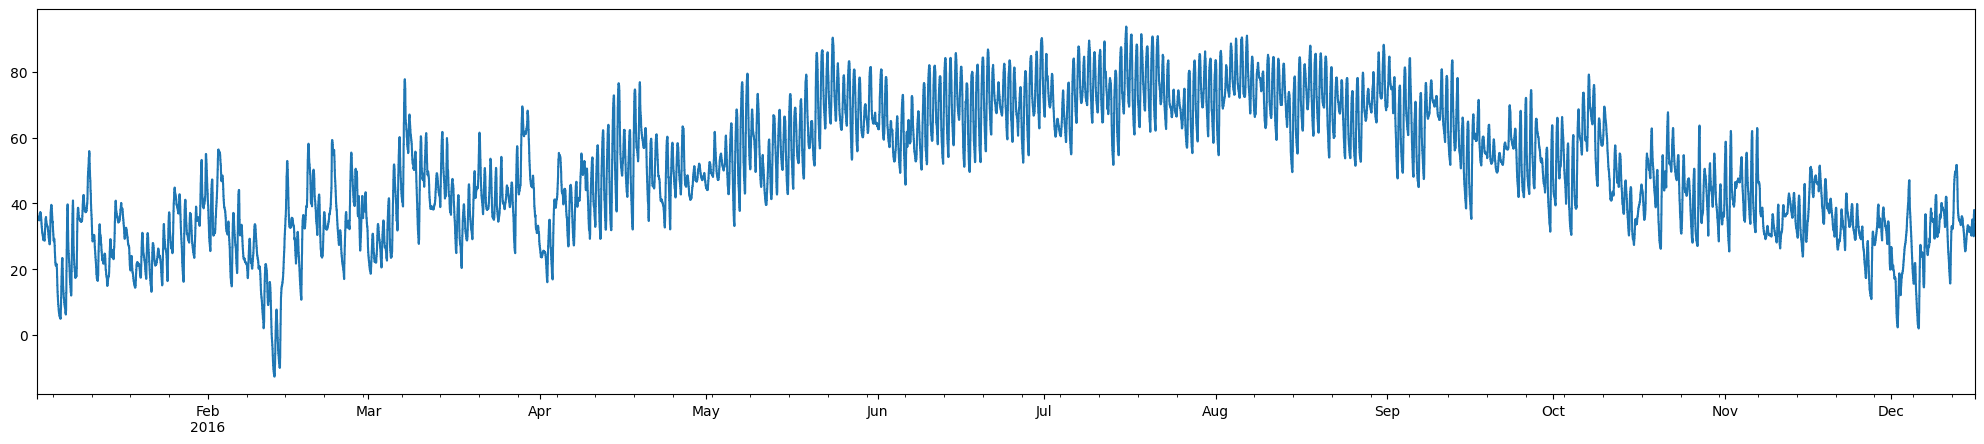

In [114]:
dataset['temperature'].plot(figsize=(25,5))

<Axes: >

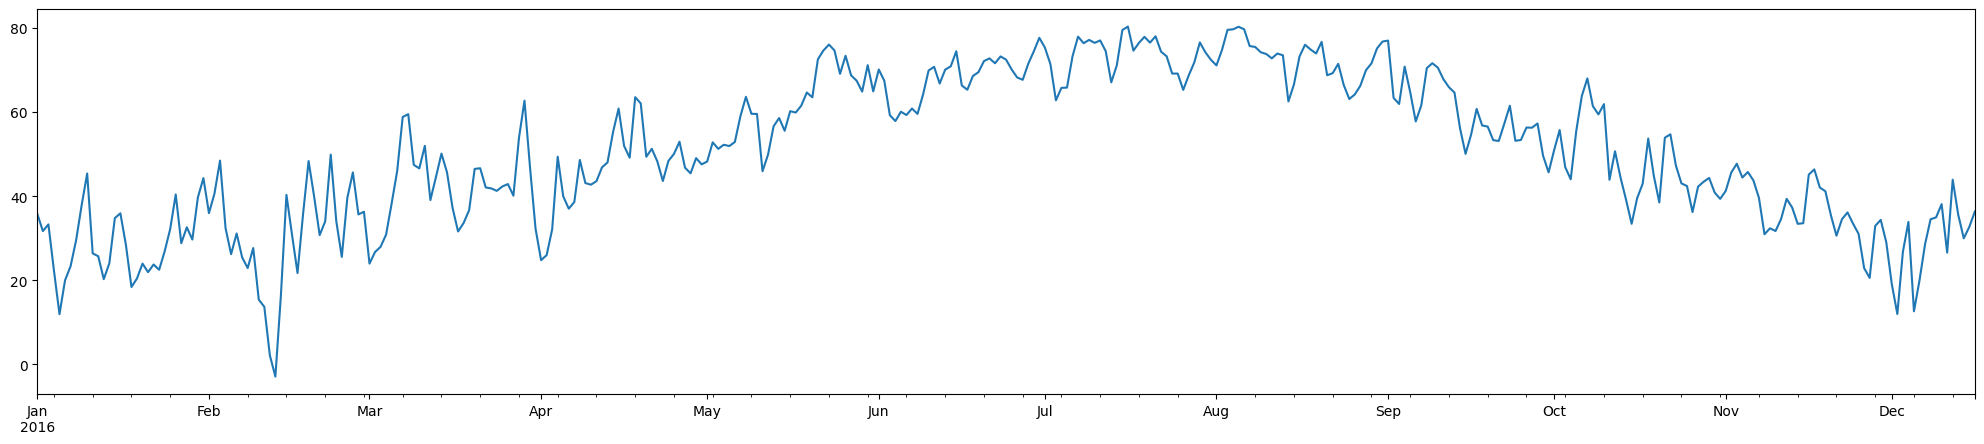

In [115]:
dataset['temperature'].resample(rule='D').mean().plot(figsize=(25,5))

In [116]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,5)

<Axes: >

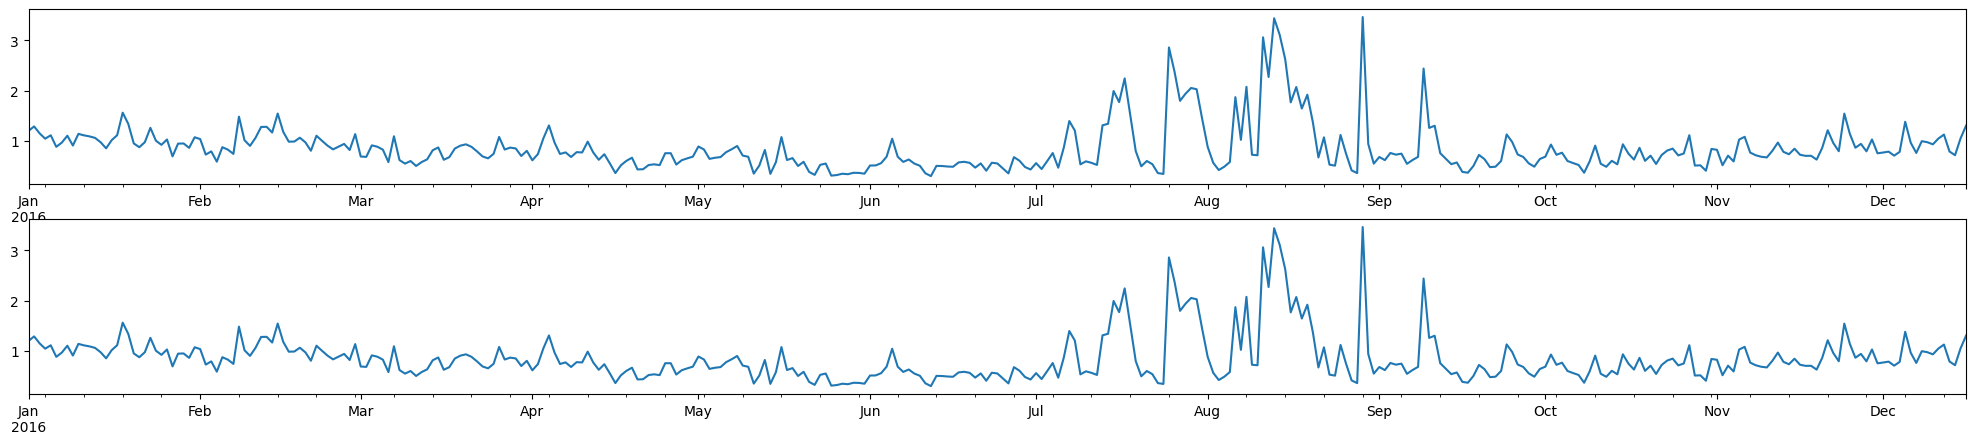

In [117]:
fig, axes = plt.subplots(nrows=2, ncols=1)
dataset['use'].resample('D').mean().plot(ax=axes[0])
dataset['House overall'].resample('D').mean().plot(ax=axes[1])

In [118]:
dataset = dataset.drop(columns=['House overall','summary', 'icon'])
dataset.shape

(503910, 25)

In [120]:
dataset['cloudCover'].unique()

array(['cloudCover', '0.75', '0', '1', '0.31', '0.44', '0.13', '0.19',
       '0.25', '0.16', '0.21', '0.15', '0.14', '0.27', '0.28', '0.17',
       '0.05', '0.1', '0.26', '0.29', '0.11', '0.09', '0.12', '0.06',
       '0.02', '0.08', '0.04', '0.35', '0.22', '0.23', '0.54', '0.39',
       '0.03', '0.07', '0.76', '0.62', '0.18', '0.79', '0.48', '0.24',
       '0.57', 0.24, 1.0, 0.31, 0.28, 0.15, 0.41, 0.1, 0.12, 0.08, 0.09,
       0.19, 0.04, 0.05, 0.29, 0.27, 0.35, 0.18, 0.06, 0.03, 0.11, 0.14,
       0.25, 0.78, 0.0, 0.16, 0.21, 0.23, 0.17, 0.75, 0.26, 0.2, 0.76,
       0.13, 0.77, 0.46, 0.07, 0.55, 0.02, 0.01, 0.51, 0.47, 0.5, 0.4,
       0.3, 0.22, 0.43, 0.33, 0.6, 0.68, 0.66, 0.45, 0.34, 0.52, 0.67,
       0.48, 0.49, 0.39, 0.37, 0.62, 0.36, 0.79, 0.61, 0.38, 0.42, 0.53,
       0.63, 0.44, 0.54, 0.32, 0.56, 0.58, 0.72, 0.57, 0.73, 0.71, 0.64,
       0.59], dtype=object)

In [122]:
dataset[dataset['cloudCover']=='cloudCover'].shape
dataset['cloudCover'][56:60]

2016-01-01 05:56:00    cloudCover
2016-01-01 05:57:00    cloudCover
2016-01-01 05:58:00          0.75
2016-01-01 05:59:00          0.75
Freq: T, Name: cloudCover, dtype: object

In [123]:
dataset['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
dataset['cloudCover'] = dataset['cloudCover'].astype('float')
dataset['cloudCover'].unique()

array([0.75, 0.  , 1.  , 0.31, 0.44, 0.13, 0.19, 0.25, 0.16, 0.21, 0.15,
       0.14, 0.27, 0.28, 0.17, 0.05, 0.1 , 0.26, 0.29, 0.11, 0.09, 0.12,
       0.06, 0.02, 0.08, 0.04, 0.35, 0.22, 0.23, 0.54, 0.39, 0.03, 0.07,
       0.76, 0.62, 0.18, 0.79, 0.48, 0.24, 0.57, 0.41, 0.78, 0.2 , 0.77,
       0.46, 0.55, 0.01, 0.51, 0.47, 0.5 , 0.4 , 0.3 , 0.43, 0.33, 0.6 ,
       0.68, 0.66, 0.45, 0.34, 0.52, 0.67, 0.49, 0.37, 0.36, 0.61, 0.38,
       0.42, 0.53, 0.63, 0.32, 0.56, 0.58, 0.72, 0.73, 0.71, 0.64, 0.59])

In [124]:
dataset['cloudCover'][56:60]

2016-01-01 05:56:00    0.75
2016-01-01 05:57:00    0.75
2016-01-01 05:58:00    0.75
2016-01-01 05:59:00    0.75
Freq: T, Name: cloudCover, dtype: float64

In [125]:
dataset = dataset.resample('H').mean()
print("Shape of hourly dataset: {} --> n_rows = {}, n_cols = {}".format(dataset.shape, dataset.shape[0],dataset.shape[1]))

Shape of hourly dataset: (8399, 25) --> n_rows = 8399, n_cols = 25


# Visualisation

<Axes: >

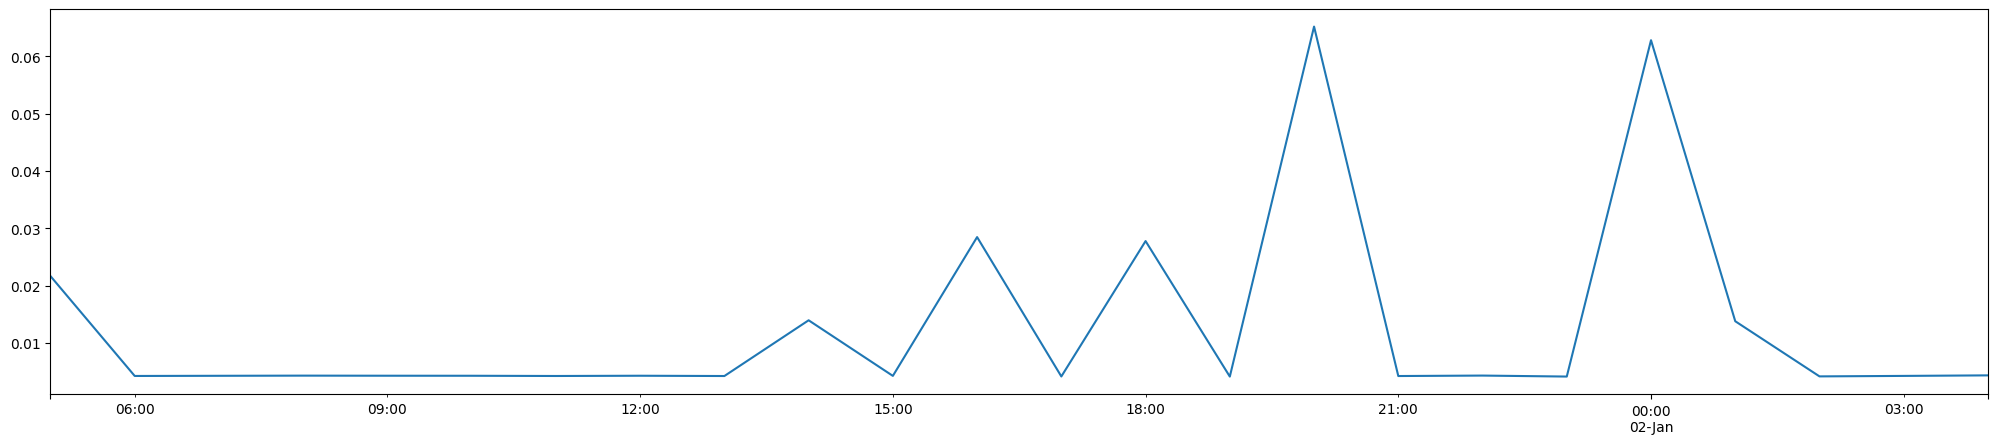

In [126]:
dataset['Microwave'].resample("h").mean().iloc[:24].plot()

[Text(0.5, 0, 'Daily Hours'), Text(0, 0.5, 'Microwave Usage (kW)')]

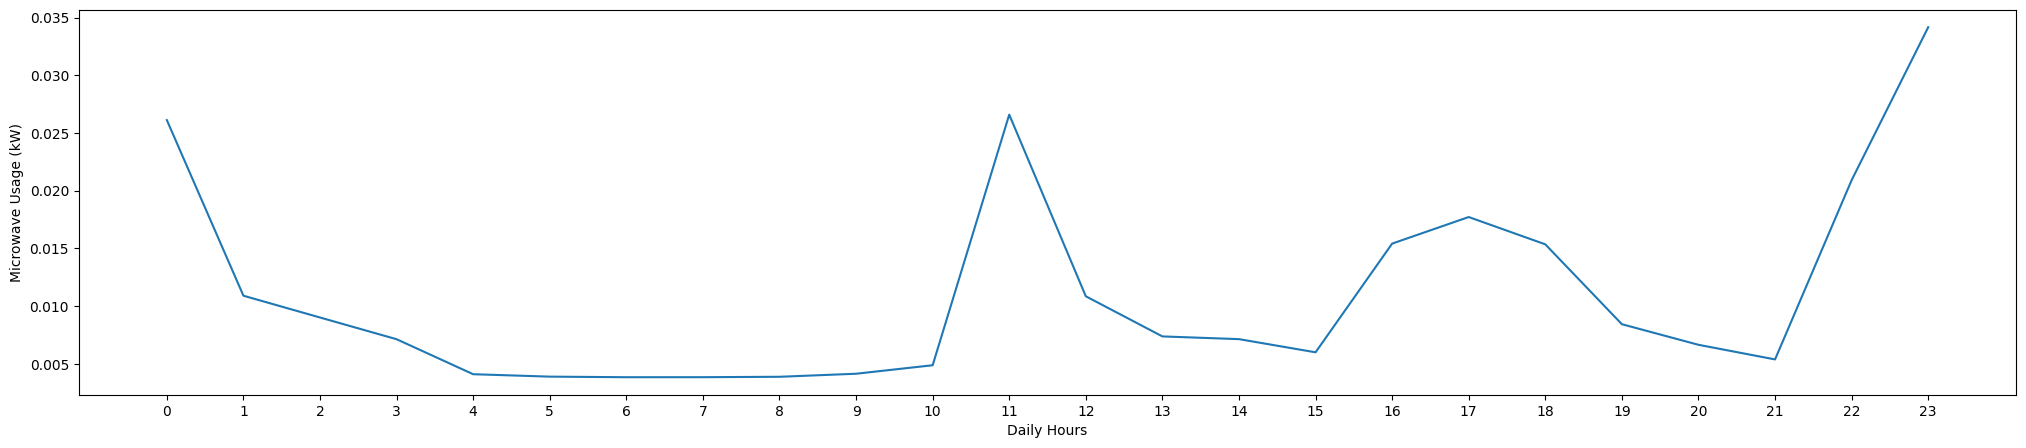

In [127]:
dataset.groupby(dataset.index.hour).mean()['Microwave'].plot(xticks=np.arange(24)).set(xlabel='Daily Hours', ylabel='Microwave Usage (kW)')

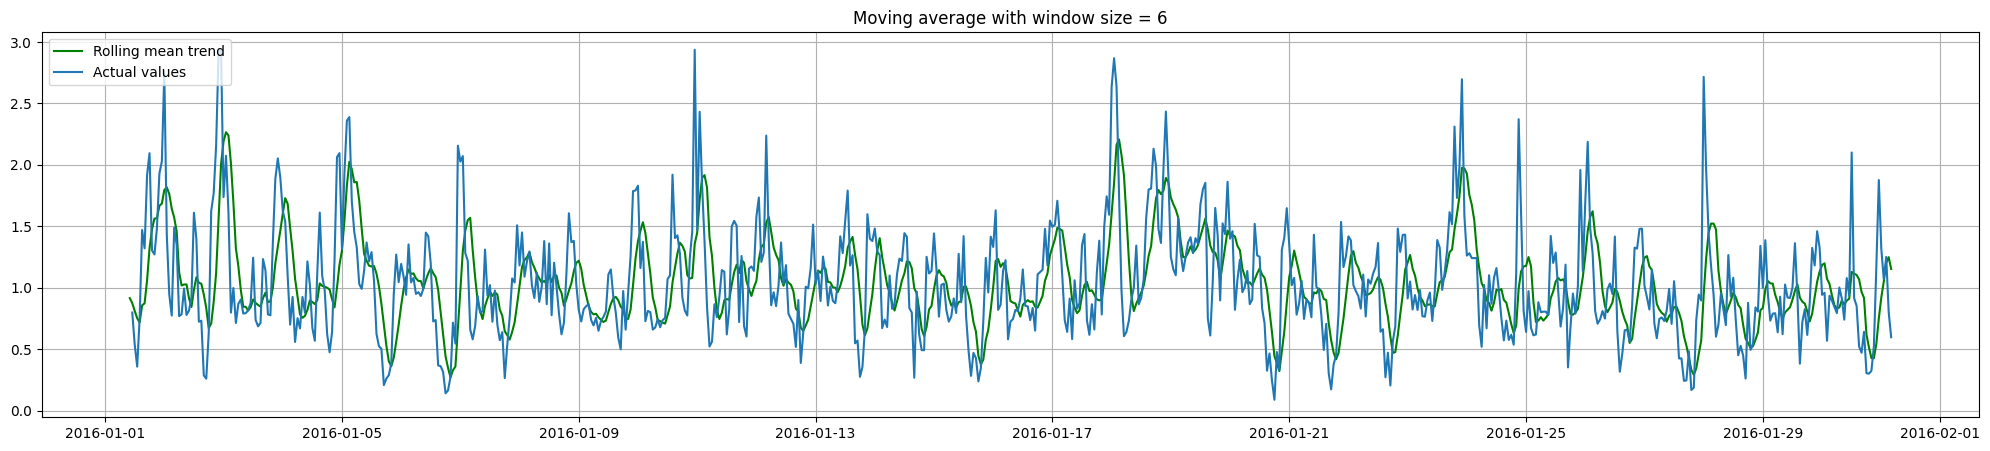

In [128]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(25,5))
    plt.title("Moving average with window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

n_samples = 24*30 # 1 month
cols = ['use']
plotMovingAverage(dataset[cols][:n_samples], window=6) # A window of 6 hours

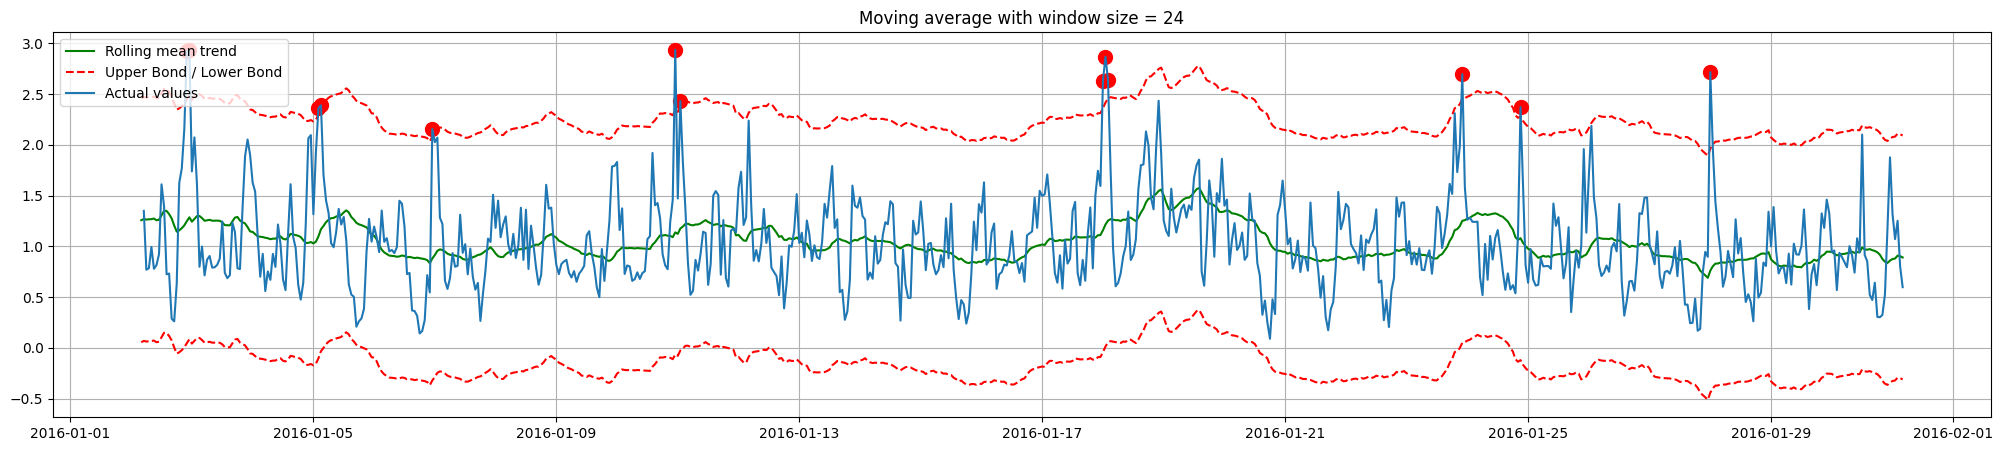

In [129]:
plotMovingAverage(dataset[cols][:n_samples], window=24, plot_intervals=True, plot_anomalies=True)

In [132]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(25, 5))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

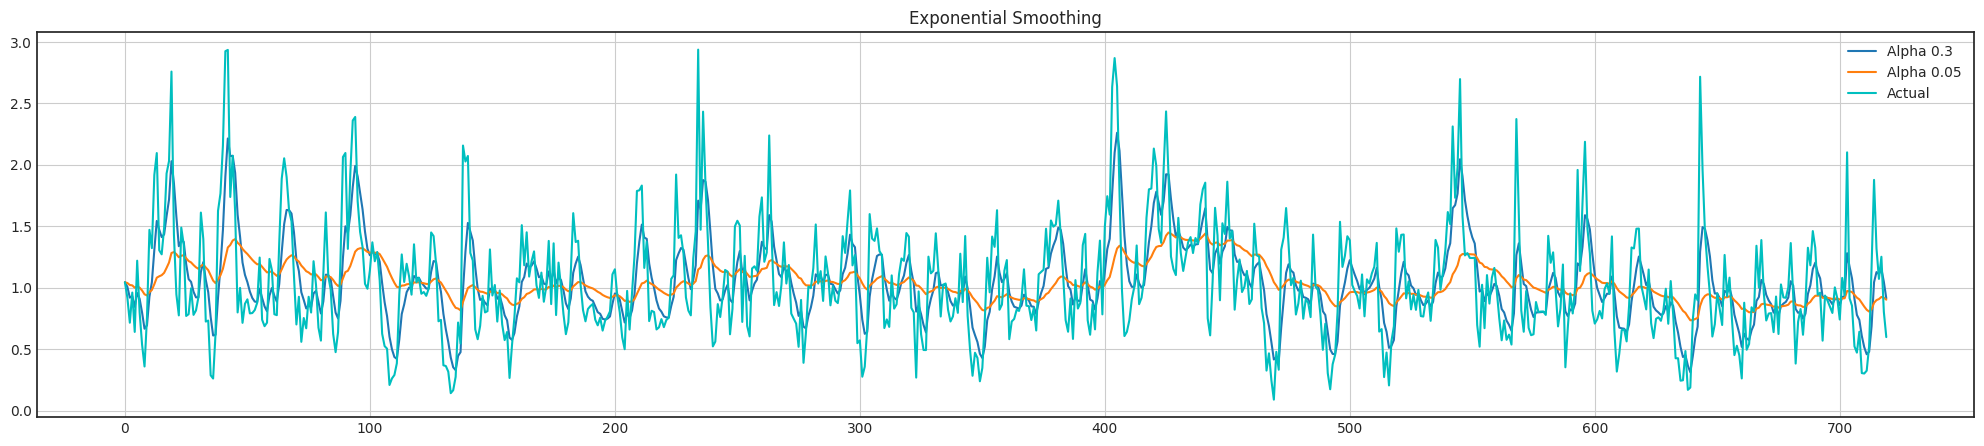

In [133]:
n_samples = 24*30 # 1 month
col = 'use'
plotExponentialSmoothing(dataset[col][:n_samples], [0.3, 0.05])

In [137]:
import statsmodels.api as sm
def forcast_ts(data, tt_ratio):
    X = data.values
    size = int(len(X) * tt_ratio)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = sm.tsa.ARIMA(history, order=(5,1,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('progress:%',round(100*(t/len(test))),'\t predicted=%f, expected=%f' % (yhat, obs), end="\r")
    error = mean_squared_error(test, predictions)
    print('\n Test MSE: %.3f' % error)

    plt.rcParams["figure.figsize"] = (25,10)
    preds = np.append(train, predictions)
    plt.plot(list(preds), color='green', linewidth=3, label="Predicted Data")
    plt.plot(list(data), color='blue', linewidth=2, label="Original Data")
    plt.axvline(x=int(len(data)*tt_ratio)-1, linewidth=5, color='red')
    plt.legend()
    plt.show()

C:\Users\sgaks\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


progress:% 94 	 predicted=0.949016, expected=0.935902
 Test MSE: 0.147


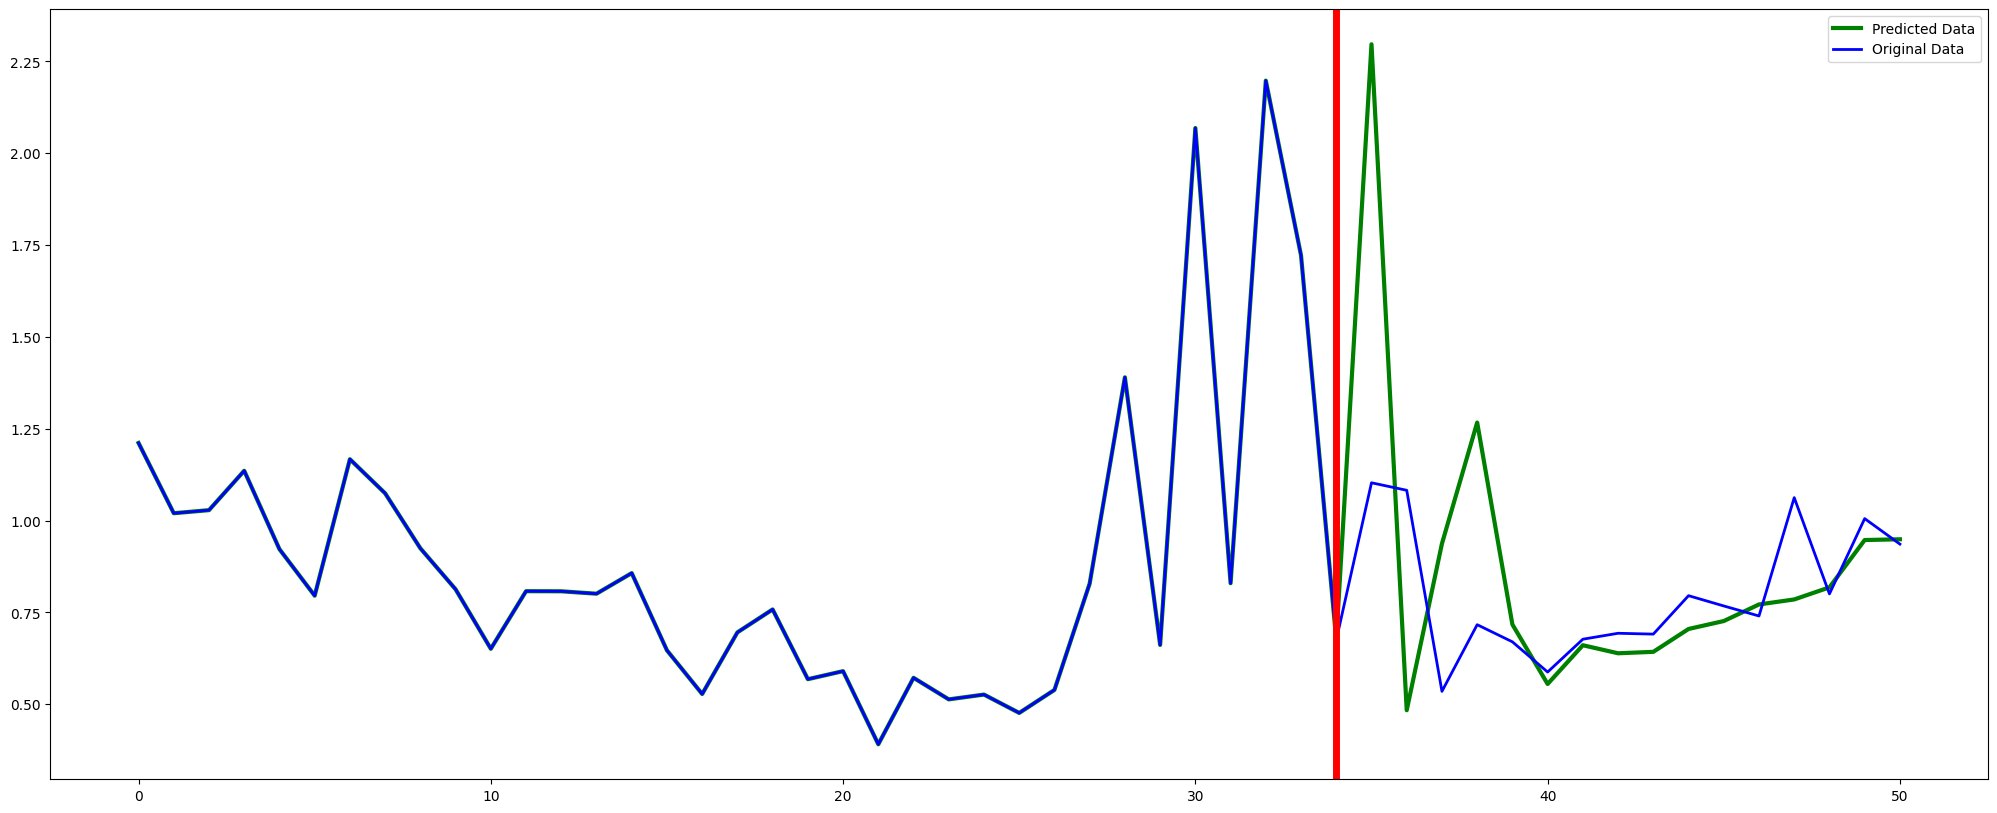

In [138]:
col = 'use'
data = dataset[col].resample('w').mean()
data.shape
tt_ratio = 0.70 # Train to Test ratio
forcast_ts(data, tt_ratio)

progress:% 99 	 predicted=0.958606, expected=1.369397
 Test MSE: 0.076


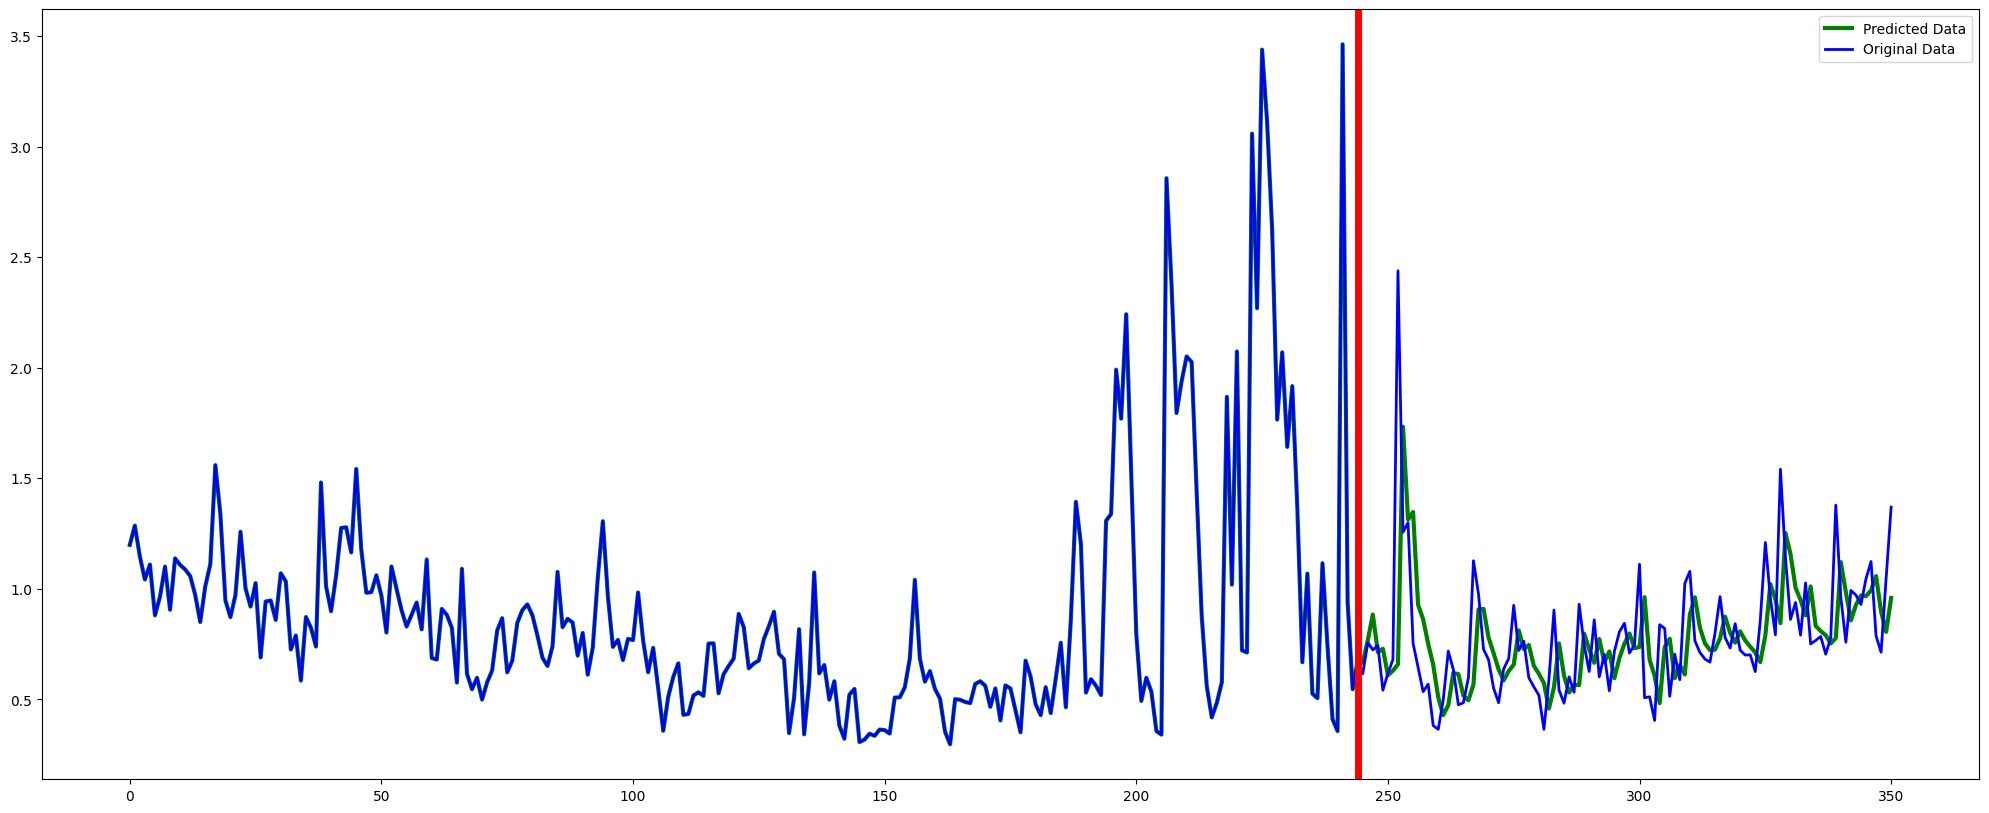

In [139]:
col = 'use'
data = dataset[col].resample('d').mean()
data.shape
tt_ratio = 0.70 # Train to Test ratio
forcast_ts(data, tt_ratio)